# Algotytm przecinania się odcinków na płaszczyźnie

In [5]:
import numpy as np
import pandas as pd
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [2]:
def draw_example_1():
    # TODO narysowac to uzywając naszego narzędzia do wizualizacji
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))

    vis.add_line_segment(line_segments)
    vis.show()
    
def draw_example_2():
    # TODO narysowac to uzywając naszego narzędzia do wizualizacji
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()


### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

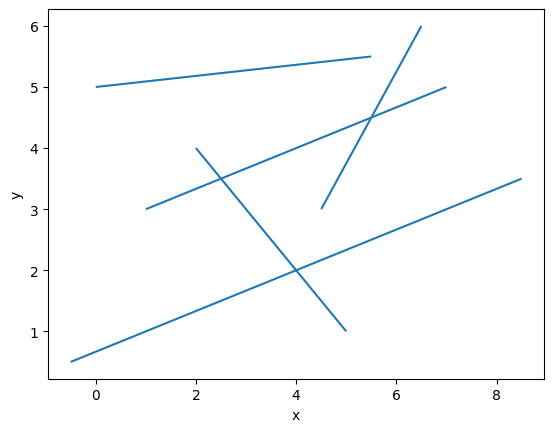

In [3]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

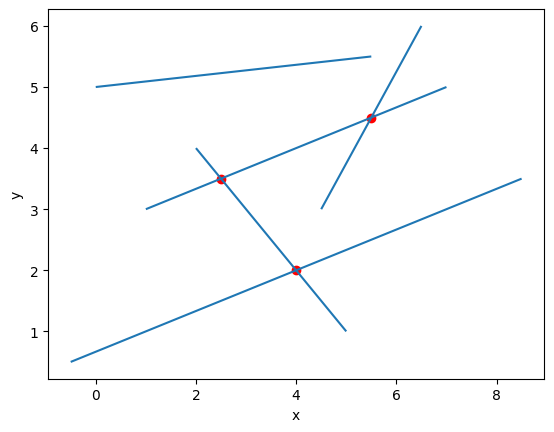

In [4]:
draw_example_2()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [6]:
def generate_uniform_sections(max_x, max_y, n):
    from random import uniform
    lines = []
    points = set()
    i = 0
    while i < n:
        point_1 = (uniform(0, max_x), uniform(0, max_y))
        point_2 = (uniform(0, max_x), uniform(0, max_y))
        if point_1[0] == point_2[0] or point_1[0] in points or point_2[0] in points:
            continue
        else:
            if point_1[0] < point_2[0]:
                lines.append((point_1, point_2))
            else:
                lines.append((point_2, point_1))
            points.add(point_1[0])
            points.add(point_2[0])
            i += 1
    return lines

In [7]:
Test().runtest(1, generate_uniform_sections)

Lab 4, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.016s


<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

In [17]:
section = generate_uniform_sections(1000,1000,5)

Zwizualizuj otrzymane odcinki

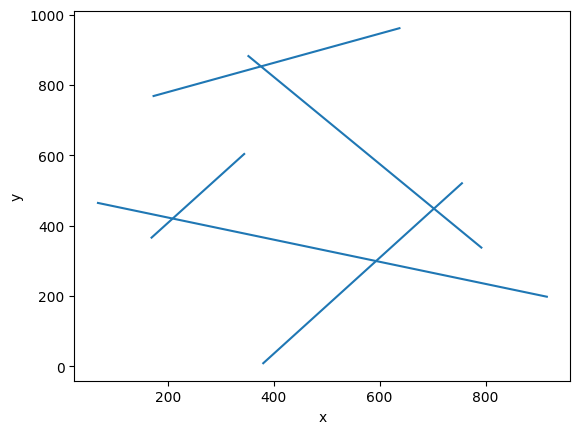

In [18]:
vis = Visualizer()
vis.add_line_segment(section)
vis.show()

Uzupełnij funkcję ```add_sections``` #interaktywne dodawanie odcinków przez rysowanie myszką (jak?) TODO

In [ ]:
# def add_sections(sections):

Uzupełnij funkcję ```is_intersection```

In [10]:
def mat_det_3x3(a, b, c):
    return (a[0]*b[1]+a[1]*c[0]+b[0]*c[1]-b[1]*c[0]-a[1]*b[0]-a[0]*c[1])

In [11]:
def orientation(a, b, c, epsilon=10 ** (-12)):
    det = mat_det_3x3(a, b, c)
    if det > epsilon:
        return 1
    elif det < -epsilon:
        return -1
    else:
        return 0

In [19]:
from heapq import heapify,heappop

class Broom:
    def __init__(self, lines, lower_left, upper_right):
        self.lines = lines
        self.lower_left = lower_left
        self.upper_right = upper_right

       # self.scenes = []
        self.events = []
        self.sorted_lines = []

        for line in lines:
            self.events.append((line[0][0], line))
            self.events.append((line[1][0], line))
        heapify(self.events)

    def sweep(self):
        while len(self.events) > 0:
            current_event = heappop(self.events)
            if self.state(current_event):
                print("false")
                return False
        print("true")
        return True

    def check_intersection(self, line_1, line_2):
        orientation_10 = orientation(line_1[0], line_1[1], line_2[0])
        orientation_11 = orientation(line_1[0], line_1[1], line_2[1])

        orientation_20 = orientation(line_2[0], line_2[1], line_1[0])
        orientation_21 = orientation(line_2[0], line_2[1], line_1[1])

        return orientation_10 != orientation_11 and orientation_20 != orientation_21

    def state(self, event):
        if event[0] == event[1][0][0]:
           # self.scenes.append(Scene(
            #    [PointsCollection([event[1][0]], color='red')],
             #   [LinesCollection(list(self.lines)),
              #   LinesCollection([(event[1][0], event[1][1])], color='green'),
               #  LinesCollection([((event[0], self.lower_left[1]), (event[0], self.upper_right[1]))], color='red')]))
            return self.add_line(event[1])
        else:
           # self.scenes.append(Scene(
            #    [PointsCollection([event[1][1]], color='red')],
             #   [LinesCollection(self.lines),
              #   LinesCollection([(event[1][0], event[1][1])], color='green'),
               #  LinesCollection([((event[0], self.lower_left[1]), (event[0], self.upper_right[1]))], color='red')]))
            return self.remove_line(event[1])

    def add_line(self, line):
        self.sorted_lines.append(line)
        self.sorted_lines.sort()
        index = self.sorted_lines.index(line)
        print(self.sorted_lines)

        if index - 1 >= 0 or index + 1 < len(self.sorted_lines):
            return self.check_intersection(self.sorted_lines[index - 1], line)

    def remove_line(self, line):
        index = self.sorted_lines.index(line)

        if index - 1 >= 0 and index + 1 < len(self.sorted_lines):
            return self.check_intersection(self.sorted_lines[index - 1], self.sorted_lines[index + 1])
        else:
            self.sorted_lines.remove(line)


In [ ]:
Test().runtest(2, is_intersection)

[((65.87783048972662, 465.3337907620716), (917.7751854871204, 197.4433814869414))]
[((65.87783048972662, 465.3337907620716), (917.7751854871204, 197.4433814869414)), ((167.60667590090938, 364.1088675956564), (345.51567467333047, 605.9066108227728))]
false


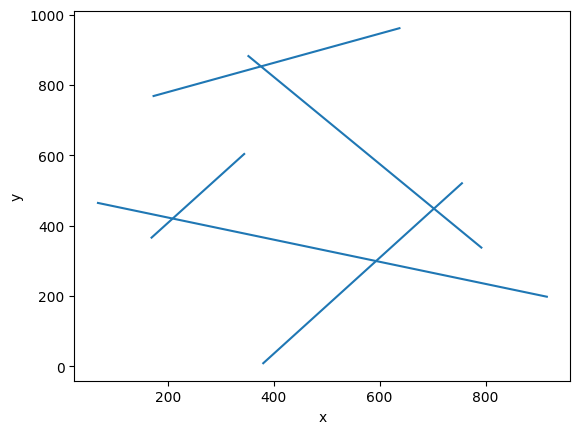

In [20]:
broom_1 = Broom(section, (0,1000), (0,1000))
broom_1.sweep()
vis=Visualizer()
vis.clear()
vis.add_line_segment(section)
vis.show()

In [ ]:
broom_1 = Broom(lines_1, (-10,-10), (10,10))
broom_1.sweep()
plot_1 = Plot(broom_1.scenes)
plot_1.draw()

### W jaki sposób zaimplementowałeś struktura stanu (stan miotły) oraz struktura zdarzeń w Twoim programie?

Odpowiedź here

Uzupełnij funkcję ```is_intersection_with_visualization```

In [26]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

def intersection(line_1, line_2):
    orientation_10 = orientation(line_1[0], line_1[1], line_2[0])
    orientation_11 = orientation(line_1[0], line_1[1], line_2[1])

    orientation_20 = orientation(line_2[0], line_2[1], line_1[0])
    orientation_21 = orientation(line_2[0], line_2[1], line_1[1])

    return orientation_10 != orientation_11 and orientation_20 != orientation_21
    

def line_sweep(segments):
    events = []  # List to store events (start and end points of segments)
    for segment in segments:
        events.append((segment[0], 'start', segment))
        events.append((segment[1], 'end', segment))

    events.sort()  # Sort the events by x-coordinate

    active_segments = set()  # Set to keep track of active segments

    intersections = []  # List to store intersection points

    for event in events:
        point, event_type, segment = event
        if event_type == 'start':
            for active_segment in active_segments:
                if intersection(segment, active_segment):
                    intersections.append((point, active_segment, segment))
            active_segments.add(segment)
        else:  # event_type == 'end'
            active_segments.remove(segment)

    return intersections

[((167.60667590090938, 364.1088675956564), ((65.87783048972662, 465.3337907620716), (917.7751854871204, 197.4433814869414)), ((167.60667590090938, 364.1088675956564), (345.51567467333047, 605.9066108227728))), ((350.533692540805, 884.2452713616882), ((170.98070453733882, 767.9668219698542), (639.2808543051495, 962.4019133576227)), ((350.533692540805, 884.2452713616882), (793.6718043891152, 335.8709049352829))), ((378.61731671845587, 6.936786162165975), ((350.533692540805, 884.2452713616882), (793.6718043891152, 335.8709049352829)), ((378.61731671845587, 6.936786162165975), (756.895510335584, 522.640244555418))), ((378.61731671845587, 6.936786162165975), ((65.87783048972662, 465.3337907620716), (917.7751854871204, 197.4433814869414)), ((378.61731671845587, 6.936786162165975), (756.895510335584, 522.640244555418)))]
(167.60667590090938, 364.1088675956564) 2
((65.87783048972662, 465.3337907620716), (917.7751854871204, 197.4433814869414)) 2
((167.60667590090938, 364.1088675956564), (345.51

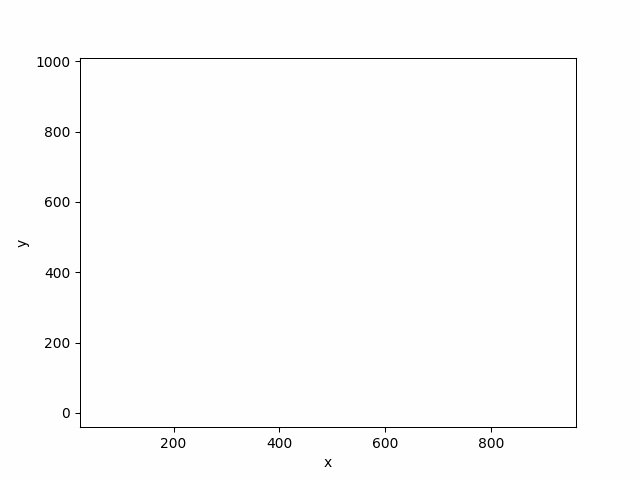

In [42]:
print(line_sweep(section))
vis=Visualizer()
vis.clear()
vis.add_line_segment(section)
for el in line_sweep(section):
    i=0
    for el2 in el:
        if i%3==0:
            vis.add_point(el2)
        else:
            
            vis.add_point(el2[0])
            vis.add_point(el2[1])
            
        i+=1
        print(el2,len(el2))

vis.show_gif()

Uzupełnij funkcję ```find_intersections```

In [ ]:
def find_intersections(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    raise Exception("Unimplemented")

In [ ]:
Test().runtest(3, find_intersections)

Uzupełnij funkcję ```find_intersections_with_visualization```

In [ ]:
def convert_to_point_lines(lines):
    for idx, line in enumerate(lines):
        point_1 = Point(line[0][0], line[0][1])
        point_2 = Point(line[1][0], line[1][1])
        lines[idx] = Line(point_1, point_2)
    return lines


class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def lines(self, line_1, line_2):
        self.line_1 = line_1
        self.line_2 = line_2

    def __eq__(self, point):
        return self.x == point.x and self.y == point.y

    def __le__(self, point):
        return self.x <= point.x

    def __hash__(self):
        return self.x.__hash__() * self.y.__hash__()

    def to_tuple(self):
        return self.x, self.y
class Line:
    def __init__(self, point_1, point_2):
        if point_1.x < point_2.x:
            self.point_1 = point_1
            self.point_2 = point_2
        else:
            self.point_1 = point_2
            self.point_2 = point_1

    def get_y(self, x):
        a = (self.point_2.y - self.point_1.y) / (self.point_2.x - self.point_1.x)
        b = self.point_2.y - a * self.point_2.x
        return a * x + b

    def to_tuple(self):
        return self.point_1.to_tuple(), self.point_2.to_tuple()
class Broom_2:
    def __init__(self):
        self.sorted_lines = []
        self.events = []
        self.scenes = []
        self.lines = dict()
        self.intersection = set()

    def sweep(self, lines):
        for line in lines:
            self.lines[line.point_1] = line
            self.lines[line.point_2] = line
            self.events.add(line.point_1)
            self.events.add(line.point_2)

        min_y = reduce(lambda actual, point: point if point.y < actual.y else actual, self.lines.keys()).y
        max_y = reduce(lambda actual, point: point if point.y > actual.y else actual, self.lines.keys()).y

        active_lines = SortedSet(key=lambda line: line.get_y(self.events[0].x))
        active_lines.update(self.sorted_lines)
        self.sorted_lines = active_lines

        while len(self.events) > 0:
            event = self.events.pop()
            self.scenes.append(Scene([PointsCollection([event.to_tuple()], color="red"),
                                      PointsCollection(list(map(lambda point: point.to_tuple(), self.intersection)), color="red")],
                                     [LinesCollection(list(map(lambda line: line.to_tuple(), lines))),
                                      LinesCollection([((event.x, min_y), (event.x, max_y))], color="red")]))
            
            self.state(event)
        return self.intersection

    def state(self, event):
        if event in self.lines:
            line = self.lines[event]
            active_lines = SortedSet(key=lambda line: line.get_y(event.x))
            active_lines.update(self.sorted_lines)
            self.sorted_lines = active_lines

            if event == line.point_1:
                self.add_line(line)
            else:
                self.remove_line(line)
        else:
            self.intersection.add(event)
            line_1 = event.line_1
            self.remove_line(line_1)
            line_2 = event.line_2
            self.remove_line(line_2)

            active_lines = SortedSet(key=lambda line: line.get_y(event.x + 10**(-12)))
            active_lines.update(self.sorted_lines)
            self.sorted_lines = active_lines

            self.add_line(line_1)
            self.add_line(line_2)

    def lines_intersection(self, line_1, line_2):
        orientation_11 = orientation(line_1.point_1.to_tuple(), line_1.point_2.to_tuple(), line_2.point_1.to_tuple())
        orientation_12 = orientation(line_1.point_1.to_tuple(), line_1.point_2.to_tuple(), line_2.point_2.to_tuple())
        orientation_21 = orientation(line_2.point_1.to_tuple(), line_2.point_2.to_tuple(), line_1.point_1.to_tuple())
        orientation_22 = orientation(line_2.point_1.to_tuple(), line_2.point_2.to_tuple(), line_1.point_2.to_tuple())

        if orientation_11 != orientation_12 and orientation_21 != orientation_22:
            a_1 = (line_1.point_2.y - line_1.point_1.y) / (line_1.point_2.x - line_1.point_1.x)
            b_1 = line_1.point_1.y - a_1 * line_1.point_1.x

            a_2 = (line_2.point_2.y - line_2.point_1.y) / (line_2.point_2.x - line_2.point_1.x)
            b_2 = line_2.point_1.y - a_2 * line_2.point_1.x

            x = (b_2 - b_1) / (a_1 - a_2)
            y = a_1 * (b_2 - b_1) / (a_1 - a_2) + b_1

            point = Point(x, y)
            point.lines(line_1, line_2)
            return point
        return None

    def add_line(self, line):
        self.sorted_lines.add(line)
        index = self.sorted_lines.index(line)

        if index - 1 >= 0 and index + 1 < len(self.sorted_lines):
            intersection = self.lines_intersection(self.sorted_lines[index - 1], self.sorted_lines[index + 1])
            if intersection is not None and intersection in self.events:
                self.events.remove(intersection)

        if index - 1 >= 0:
            intersection = self.lines_intersection(self.sorted_lines[index - 1], line)
            if intersection is not None and intersection not in self.events and intersection not in self.intersection:
                self.events.add(intersection)
                
        if index + 1 < len(self.sorted_lines):
            intersection = self.lines_intersection(line, self.sorted_lines[index + 1])
            if intersection is not None and intersection not in self.events and intersection not in self.intersection:
                self.events.add(intersection)

    def remove_line(self, line):
        index = self.sorted_lines.index(line)

        if index - 1 >= 0 and index + 1 < len(self.sorted_lines):
            intersection = self.lines_intersection(self.sorted_lines[index - 1], self.sorted_lines[index + 1])
            if intersection is not None and intersection not in self.intersection:
                self.events.add(intersection)
        self.sorted_lines.remove(line)

### Czy konieczne były zmiany w strukturze zdarzeń. Jeśli tak, to jakie? Czy w przypadku obu algorytmów konieczne są takie same struktury zdarzeń?
### Odpowiedź uzasadnij. 

Odpowiedź here

### Jak obsługiwane są zdarzenia początku odcinka, końca odcinka i przecięcia odcinków z uwzględnianiem wybranych struktur danych?

Odpowiedź here

### Samemu zaprojektuj test, który uwzględnia taki układ odcinków, przy którym pewne przecięcia będą wykrywane więcej niż jeden raz

In [ ]:
# testing_sections = ???

In [ ]:
### Czy Twój program uwzględnia powyższy przypadek? Jeśli tak, to jak? 

Odpowiedź here

### Zadanie dodatkowe
Zaimplementuj inną strukturę stanu. Opisz ją w sprawozdaniu. Porównaj efektywność algorytmu dla obu struktur robiąc testy na odpowiednio dużych zestawach odcinków.